# Gold Price Prediction

This DataSet includes the real time gold prices(in USD) from 2012 to 2022.

In [1]:
import pandas as pd # Data frame 
import numpy as np # Data Calculation 
from scipy import stats

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 

#################### Model #####################
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm # 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split # data partition
%matplotlib inline
import os

#  Data Import 

In [2]:
df=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Gold.csv")
df

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0
...,...,...,...,...,...,...
2542,11/06/2012,1715.0,163585.0,1685.4,1720.9,1683.5
2543,11/05/2012,1683.2,109647.0,1676.7,1686.2,1672.5
2544,11/02/2012,1675.2,205777.0,1715.6,1717.2,1674.8
2545,11/01/2012,1715.5,105904.0,1720.4,1727.5,1715.1


In [3]:
df.rename(columns={'Close/Last':'CL'},inplace=True)

# Data Type

In [4]:
df.head()

,Date,CL,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


In [5]:
df.tail()

,Date,CL,Volume,Open,High,Low
2542,11/06/2012,1715.0,163585.0,1685.4,1720.9,1683.5
2543,11/05/2012,1683.2,109647.0,1676.7,1686.2,1672.5
2544,11/02/2012,1675.2,205777.0,1715.6,1717.2,1674.8
2545,11/01/2012,1715.5,105904.0,1720.4,1727.5,1715.1
2546,10/31/2012,1719.1,110928.0,1710.3,1726.6,1709.8


In [6]:
df= df.head().drop(['Date','Volume'],axis=1) 
df

,CL,Open,High,Low
0,1648.3,1667.2,1670.9,1640.7
1,1668.8,1668.8,1674.8,1658.5
2,1669.2,1657.7,1679.4,1653.8
3,1658.0,1654.5,1666.8,1641.2
4,1654.1,1662.9,1675.5,1648.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL      5 non-null      float64
 1   Open    5 non-null      float64
 2   High    5 non-null      float64
 3   Low     5 non-null      float64
dtypes: float64(4)
memory usage: 288.0 bytes


In [8]:
df.isna().sum()

CL      0
Open    0
High    0
Low     0
dtype: int64

In [9]:
df.describe()

,CL,Open,High,Low
count,5.000000,5.000000,5.000000,5.000000
mean,1659.680000,1662.220000,1673.480000,1648.440000
std,9.182429,6.094834,4.799687,7.785435
min,1648.300000,1654.500000,1666.800000,1640.700000
25%,1654.100000,1657.700000,1670.900000,1641.200000
50%,1658.000000,1662.900000,1674.800000,1648.000000
75%,1668.800000,1667.200000,1675.500000,1653.800000
max,1669.200000,1668.800000,1679.400000,1658.500000


# Outlier and Treatement

<AxesSubplot:>

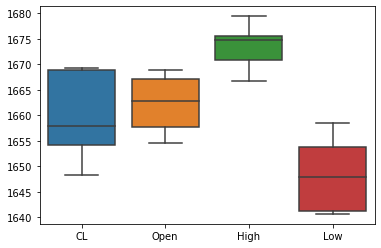

In [10]:
sns.boxplot(data=df)

<AxesSubplot:ylabel='CL'>

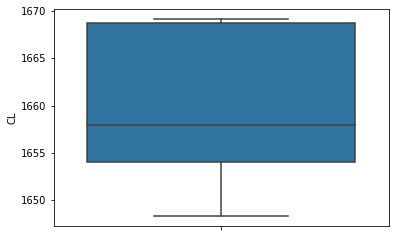

In [11]:
sns.boxplot(y='CL',data=df)

In [12]:
df.isna().sum()

CL      0
Open    0
High    0
Low     0
dtype: int64

# Data Visulazation

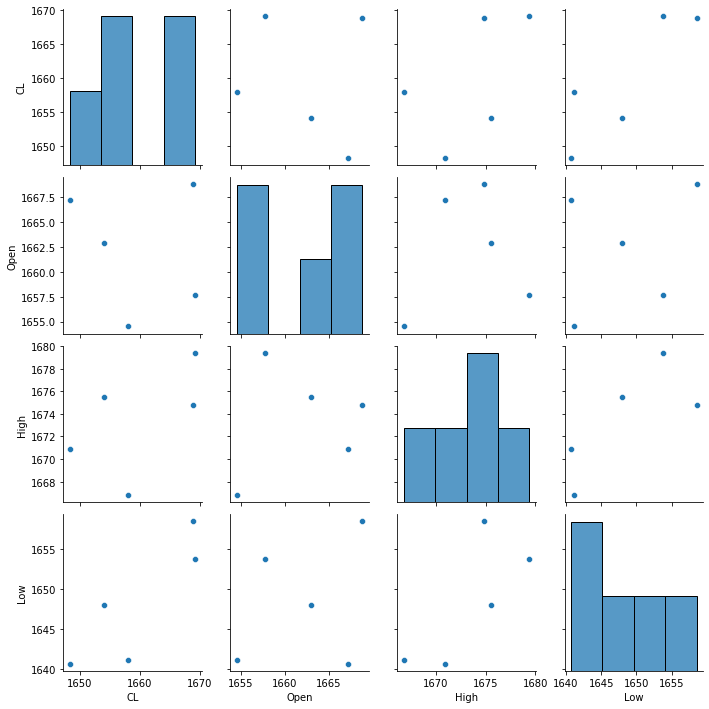

In [13]:
sns.pairplot(df)

# Data Partition 

In [14]:
df.head()

,CL,Open,High,Low
0,1648.3,1667.2,1670.9,1640.7
1,1668.8,1668.8,1674.8,1658.5
2,1669.2,1657.7,1679.4,1653.8
3,1658.0,1654.5,1666.8,1641.2
4,1654.1,1662.9,1675.5,1648.0


In [15]:

X = df.drop('CL', axis= 1)

y = df[['CL']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [16]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,CL,Open,High,Low
3,1658.0,1654.5,1666.8,1641.2
2,1669.2,1657.7,1679.4,1653.8
0,1648.3,1667.2,1670.9,1640.7


# Correlation Matrix

In [37]:
df.corr()

,CL,Open,High,Low,fitted_value,residual,Prediction
CL,1.000000,-0.689734,0.691786,0.901098,1.000000,-0.041401,1.000000
Open,-0.689734,1.000000,0.045700,-0.307553,-0.689734,-0.694887,-0.689734
High,0.691786,0.045700,1.000000,0.936482,0.691786,-0.750124,0.691786
Low,0.901098,-0.307553,0.936482,1.000000,0.901098,-0.470550,0.901098
fitted_value,1.000000,-0.689734,0.691786,0.901098,1.000000,-0.041401,1.000000
residual,-0.041401,-0.694887,-0.750124,-0.470550,-0.041401,1.000000,-0.041401
Prediction,1.000000,-0.689734,0.691786,0.901098,1.000000,-0.041401,1.000000


In [17]:
np.round(df.corr(),2)

,CL,Open,High,Low
CL,1.00,-0.69,0.69,0.90
Open,-0.69,1.00,0.05,-0.31
High,0.69,0.05,1.00,0.94
Low,0.90,-0.31,0.94,1.00


<AxesSubplot:>

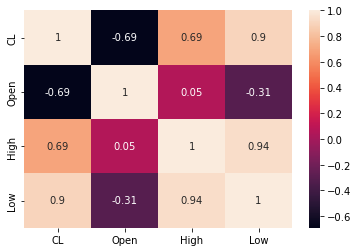

In [18]:
sns.heatmap(np.round(df.corr(),2),annot = True)

In [20]:
X1=df.drop(['CL'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Open    2.177298e+05
High    3.880876e+06
Low     2.399506e+06
dtype: float64

# Prediction

In [23]:
import statsmodels.formula.api as smf
model = smf.ols('CL ~ Open + High + Low ',data=df).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                nan
Time:                        20:38:54   Log-Likelihood:                 61.983
No. Observations:                   3   AIC:                            -118.0
Df Residuals:                       0   BIC:                            -120.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0139        inf          0        nan         nan         nan
Open           0.2149        inf          0        nan         nan         nan
High          -2.6114        inf         -0        nan         nan         nan
Low            3.4457        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.284
Skew:                          -0.072   Prob(JB):                        0.868
Kurtosis:                       1.500   Cond. No.                     4.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import statsmodels.formula.api as smf
model2 = smf.ols('CL ~ High + Low',data=df).fit()
model2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                nan
Time:                        20:40:54   Log-Likelihood:                 65.622
No. Observations:                   3   AIC:                            -125.2
Df Residuals:                       0   BIC:                            -127.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    250.6647        inf          0        nan         nan         nan
High          -2.0121        inf         -0        nan         nan         nan
Low            2.9010        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                     7.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df['Prediction']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,CL,Open,High,Low,fitted_value,residual,Prediction
3,1658.0,1654.5,1666.8,1641.2,1658.0,-7.639755e-11,1658.0
2,1669.2,1657.7,1679.4,1653.8,1669.2,-7.662493e-11,1669.2
0,1648.3,1667.2,1670.9,1640.7,1648.3,-7.662493e-11,1648.3


<AxesSubplot:xlabel='Prediction', ylabel='residual'>

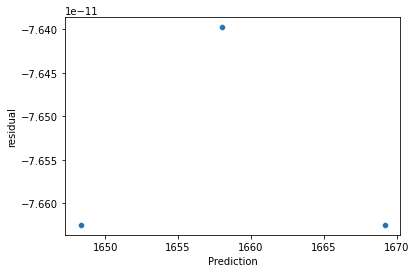

In [30]:
sns.scatterplot(x='Prediction', y='residual',data=df)

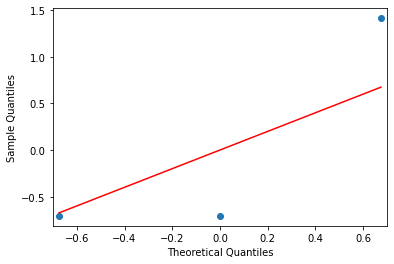

In [31]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

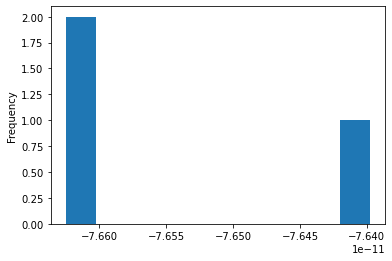

In [32]:
df['residual'].plot.hist()

# Test data

In [33]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Open,High,Low,CL
1,1668.8,1674.8,1658.5,1668.8
4,1662.9,1675.5,1648.0,1654.1


In [34]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Open,High,Low,CL,Prediction
1,1668.8,1674.8,1658.5,1668.8,1692.090097
4,1662.9,1675.5,1648.0,1654.1,1660.221498


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(df.CL, df.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 1.0
